In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. British Windfarm

### 1.1. Load Datasets

In [2]:
# load data into pandas dataframe
turbine_one = pd.read_csv('../data/Kelmarsh_SCADA_2020_3086/Turbine_Data_Kelmarsh_1_2020-01-01_-_2021-01-01_228.csv', header=9)
turbine_two = pd.read_csv('../data/Kelmarsh_SCADA_2020_3086/Turbine_Data_Kelmarsh_2_2020-01-01_-_2021-01-01_229.csv', header=9)
turbine_three = pd.read_csv('../data/Kelmarsh_SCADA_2020_3086/Turbine_Data_Kelmarsh_3_2020-01-01_-_2021-01-01_230.csv', header=9)
turbine_four = pd.read_csv('../data/Kelmarsh_SCADA_2020_3086/Turbine_Data_Kelmarsh_4_2020-01-01_-_2021-01-01_231.csv', header=9)
turbine_five = pd.read_csv('../data/Kelmarsh_SCADA_2020_3086/Turbine_Data_Kelmarsh_5_2020-01-01_-_2021-01-01_232.csv', header=9)
turbine_six = pd.read_csv('../data/Kelmarsh_SCADA_2020_3086/Turbine_Data_Kelmarsh_6_2020-01-01_-_2021-01-01_233.csv', header=9)

In [3]:
# Extract only the first 28 columns, which contain the data we need
turbine_one = turbine_one.iloc[:, :28]
turbine_two = turbine_two.iloc[:, :28]
turbine_three = turbine_three.iloc[:, :28]
turbine_four = turbine_four.iloc[:, :28]
turbine_five = turbine_five.iloc[:, :28]
turbine_six = turbine_six.iloc[:, :28]

# since we have to perform the same operations on each turbine, we can create a list of the dataframes and iterate through them
turbine_list = [turbine_one, turbine_two, turbine_three, turbine_four, turbine_five, turbine_six]

# print the keys of the first turbine to see what columns we have
# print(turbine_one.keys())

# rename the '# Date and time' column to 'Date' for easier access, convert it to pd.datetime and set it as the index
for i, turbine in enumerate(turbine_list):
    turbine.rename(columns={'# Date and time': 'Date'}, inplace=True)
    turbine['Date'] = pd.to_datetime(turbine['Date'])
    turbine.set_index('Date', inplace=True)
    print(f"There exist {len(turbine)} data points for turbine {i+1}")

There exist 52704 data points for turbine 1
There exist 52704 data points for turbine 2
There exist 52704 data points for turbine 3
There exist 52704 data points for turbine 4
There exist 52704 data points for turbine 5
There exist 52704 data points for turbine 6


### 1.2. Cleaning Data

In [4]:
# interpolate all rows that contain NaN values
for i, turbine in enumerate(turbine_list):
    turbine.interpolate(method='linear', inplace=True)
    

In [5]:
# check for duplicates
for i, turbine in enumerate(turbine_list):
    print(f"There exist {len(turbine[turbine.duplicated()])} duplicated rows in turbine{i+1}")

There exist 0 duplicated rows in turbine1
There exist 0 duplicated rows in turbine2
There exist 0 duplicated rows in turbine3
There exist 0 duplicated rows in turbine4
There exist 0 duplicated rows in turbine5
There exist 0 duplicated rows in turbine6


In [6]:
turbine_one.head()
print(turbine_one.keys())

Index(['Wind speed (m/s)', 'Wind speed, Standard deviation (m/s)',
       'Wind speed, Minimum (m/s)', 'Wind speed, Maximum (m/s)',
       'Long Term Wind (m/s)', 'Wind speed Sensor 1 (m/s)',
       'Wind speed Sensor 1, Standard deviation (m/s)',
       'Wind speed Sensor 1, Minimum (m/s)',
       'Wind speed Sensor 1, Maximum (m/s)', 'Wind speed Sensor 2 (m/s)',
       'Wind speed Sensor 2, Standard deviation (m/s)',
       'Wind speed Sensor 2, Minimum (m/s)',
       'Wind speed Sensor 2, Maximum (m/s)',
       'Density adjusted wind speed (m/s)', 'Wind direction (°)',
       'Nacelle position (°)', 'Wind direction, Standard deviation (°)',
       'Wind direction, Minimum (°)', 'Wind direction, Maximum (°)',
       'Nacelle position, Standard deviation (°)',
       'Nacelle position, Minimum (°)', 'Nacelle position, Maximum (°)',
       'Vane position 1+2 (°)', 'Vane position 1+2, Max (°)',
       'Vane position 1+2, Min (°)', 'Vane position 1+2, StdDev (°)',
       'Energy Export (

### 1.3. Plot Energy Exported and Wind Speed

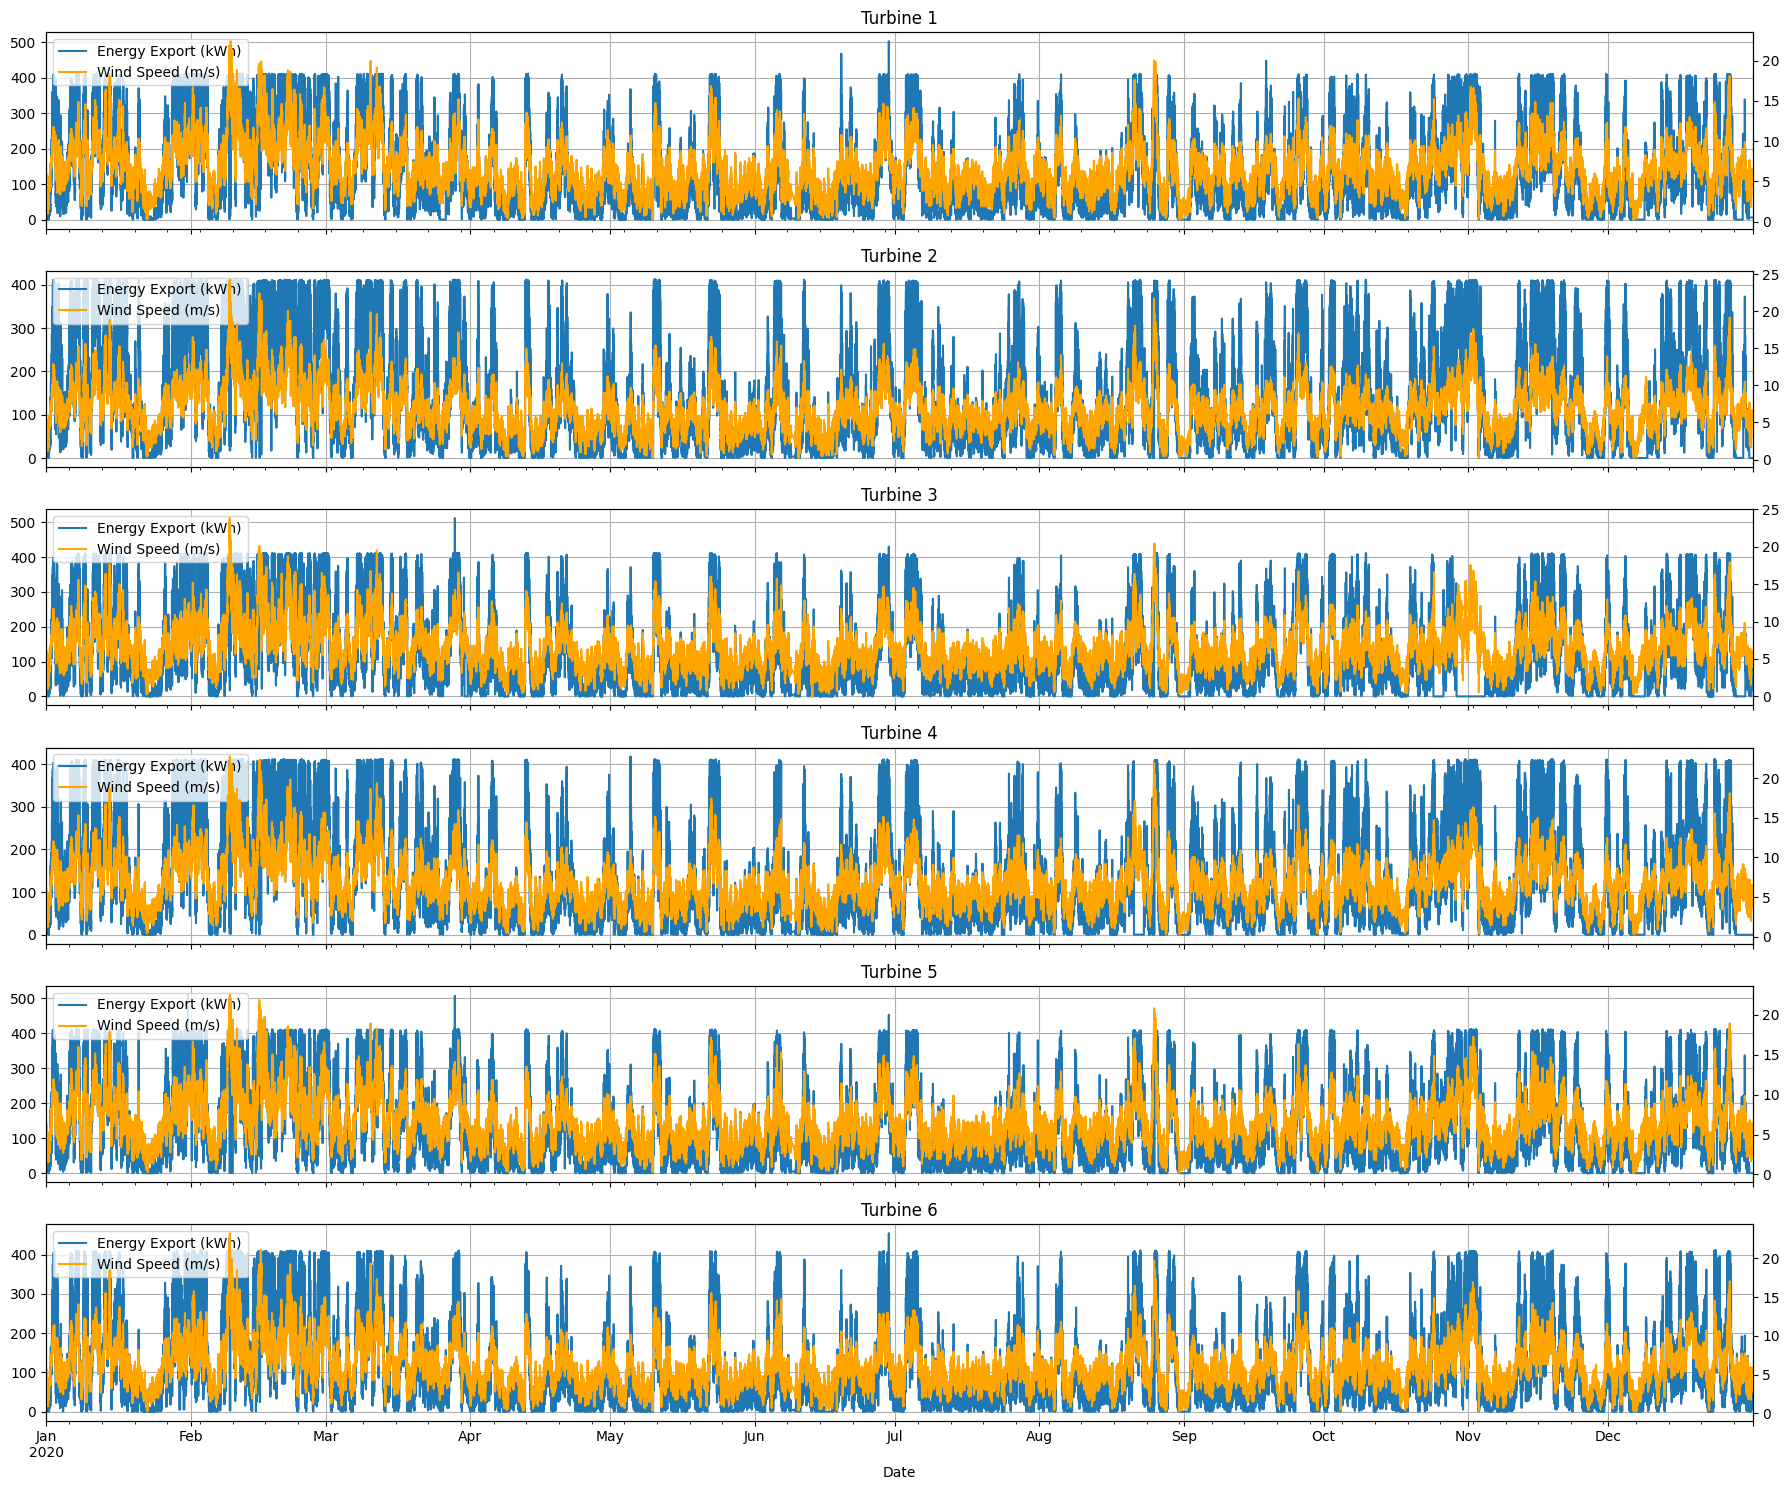

In [7]:
# We start with plotting variables and look for visually correlations
# That there is a correlation between the power output and the wind speed seems logical. Thus we start with them:
# To keep things simple, we only look at a time period of two months

start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2021-01-01')


fig, axs = plt.subplots(6, 1, figsize=(18, 15), sharex=True)

for i, turbine in enumerate(turbine_list):
    turbine[start_date:end_date].plot(y='Energy Export (kWh)', ax=axs[i], title=f'Turbine {i+1}', label='Energy Export (kWh)', legend=False)
    axs[i].grid()
    ax2 = axs[i].twinx()
    turbine[start_date:end_date].plot(y='Wind speed (m/s)', ax=ax2, color='orange', label='Wind Speed (m/s)', legend=False)
    lines = [axs[i].get_lines()[0], ax2.get_lines()[0]]
    axs[i].legend(lines, [line.get_label() for line in lines], loc='upper left')

fig.tight_layout()
plt.show()

**Analysis of the Plot above:**
1. We see a clear correlation between the two variables through time.
2. It is possible that there is no energy exportet altough there would be sufficient wind to do so. Maybe there were some repair issues for turbine 6 at the end of the considered time period. Those data points could make training more difficult, since this seems to be a non-regular behaviour.

In [8]:
# Another interesting variable is the wind direction. We can plot it as a polar plot



### 1.4. Boxplot
Next we create boxplots for the respective variables to gain further insights.

In [9]:
# 

### 1.5. Store cleaned final data (classic time series data)

In [10]:
# store the data in a folder data_cleaned and save it as csv
for i, turbine in enumerate(turbine_list):
    turbine.to_csv(f'../data_cleaned/turbine_{i+1}.csv')

### 1.6. Create Data for a supervised learning problem
[Blog Entry](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)